Doubles every: 1.1538362585897173


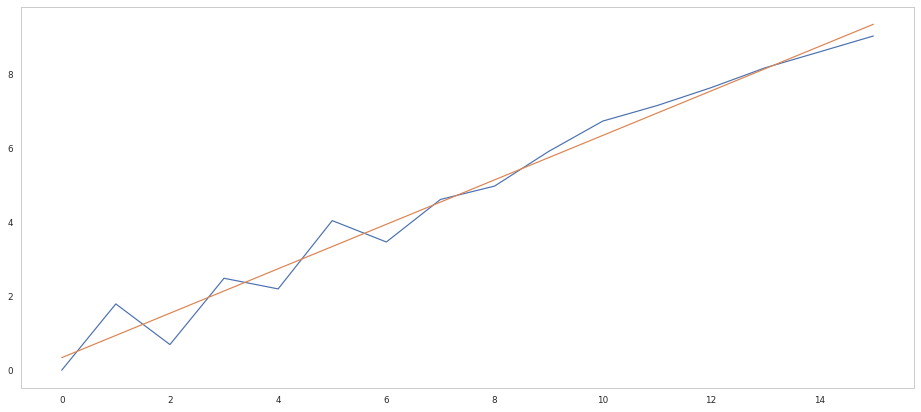

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)
sns.set_style("whitegrid", {'axes.grid' : False}) #remove grey grid
sns.set_context("paper") #changes the theme or the size or something ... not sure why I added this. 
plt.rcParams['figure.figsize'] = [16, 7] #changes the size


plague = pd.read_csv("great_plague.csv")

plague['log deaths'] = np.log(plague['plague_deaths']) 

plague.head()


X = plague.iloc[:16, 1].values.reshape(-1, 1)  
Y = plague.iloc[:16, 3].values.reshape(-1, 1)  
model = LinearRegression()  
model.fit(X, Y)  
Y_pred = model.predict(X)  
plt.plot(Y)
plt.plot(Y_pred)



r  = model.coef_[0][0]


#Doubles every () weeks
print("Doubles every:",np.log(2) / r)

Params and fitting

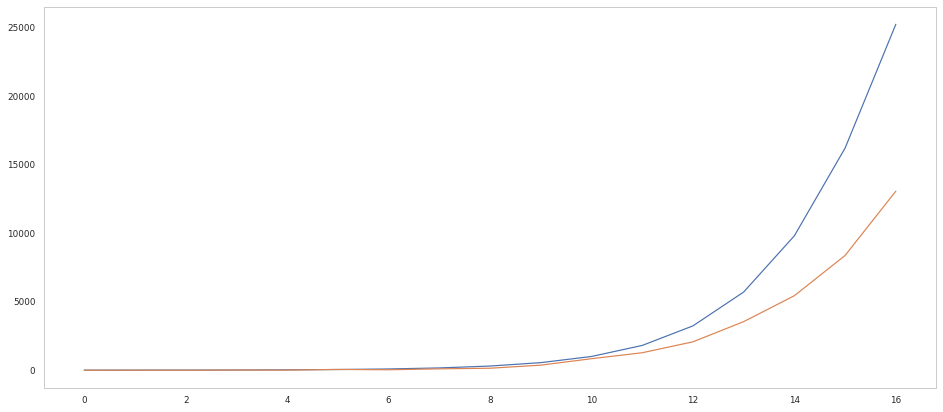

In [219]:
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
def SIRode(y,t, beta, gamma, phi):
    S,I,R = y[0],y[1],y[2]
    dydt = [-beta/N*(N-(I))*(I) , beta/N*(N-(I))*(I) - gamma*I, gamma*I ]
    return dydt

###PARAMS###
N = 130000
k = 2.5
gamma = 1/k
beta = r + gamma
R0 = beta/gamma
y0 = [N,1/(0.4*beta),0]
dt = 1


###Test###
t = np.arange(0,16 + dt, dt )
sol = odeint(SIRode, y0, t, args = (beta,gamma,phi))
plt.plot(t,sol[:,1], label = "I")
plt.plot(plague['plague_deaths'][:17], label = "Death")



#plt.plot(plague['plague_deaths'])

[130000, 2.4981695704153086, 0]

In [221]:
#Optimizer
print(beta)
print(gamma)

#Beta range 0.3 --> 1.6
#Gamma range 0.1 --> 1

bestBeta = beta
bestGamma = gamma

MSEInit = mean_squared_error(np.array(plague['plague_deaths'][:17]),sol[:,1])

for i in range(0,100):
    for j in range(0,100):
        beta  = np.random.uniform(0.3,1.6,1)[0]
        gamma = np.random.uniform(0.1,1,1)[0]
        y0 = [N,1/(0.4*beta),0]
        
        sol = odeint(SIRode, y0, t, args = (beta,gamma,phi))
        
        MSE = mean_squared_error(np.array(plague['plague_deaths'][:17]),sol[:,1])
        
        if MSE < MSEInit:
            MSEInit = MSE
            bestBeta = beta
            bestGamma = gamma
            

bestBeta
bestGamma

1.000732708302258
0.4


0.12097458404027826

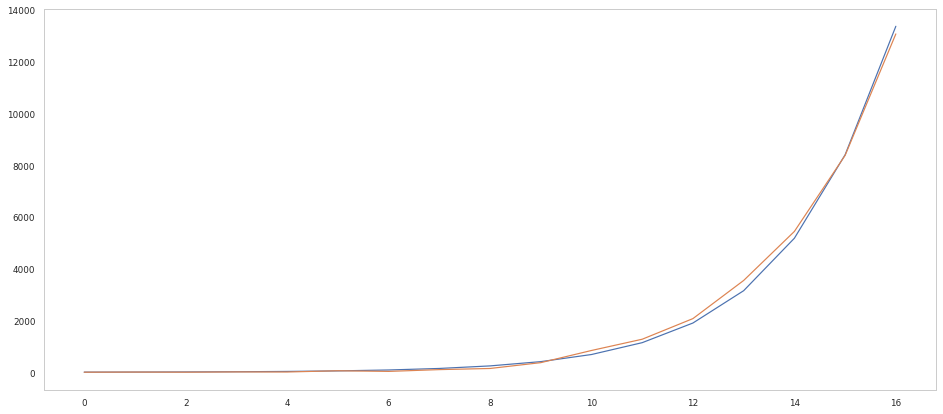

In [222]:
###PARAMS###
N = 130000
k = 2.5
gamma = bestGamma
beta = bestBeta
R0 = beta/gamma
y0 = [N,1/(0.4*beta),0]
dt = 1


###Test###
t = np.arange(0,16 + dt, dt )
sol = odeint(SIRode, y0, t, args = (beta,gamma,phi))
plt.plot(t,sol[:,1], label = "I")
plt.plot(plague['plague_deaths'][:17], label = "Death")